In [1]:
from algorithms import *
from algorithms.MlpV2 import *
data = Data()
data.print_shapes()

(45000, 128)
(45000, 10)
(5000, 128)
(5000, 10)
(10000, 128)
(10000, 10)


In [2]:
X_train = data.train_data
y_train = data.train_label

In [3]:
X_valid = data.validation_data
y_valid = data.validation_label

In [4]:
X_test = data.test_data
y_test = data.test_label

In [5]:
batch_size = [64, 128, 256]
learning_rate = [0.001, 0.01, 0.1]
loss = []
train_acc = []
valid_acc = []
train_precision = []
valid_precision = []
train_recall = []
valid_recall = []
train_f1 = []
valid_f1 = []

In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score

for batch in batch_size:
    for lr in learning_rate:
        nn = MlpV2(learning_rate=lr, batch_size=batch)
        nn.set_optimiser(opt_type='Momentum', params = [0.9])
        nn.set_batchNormalizer()
        nn.add_layer(128,512,"relu",1)
        nn.add_layer(512,256,"relu",1)
        nn.add_layer(256,128,"relu",1)
        nn.add_layer(128,64,"relu",1)
        nn.add_layer(64,10,"softmax",1)
    
        train_loss = nn.fit(X_train, y_train, epochs=50)
        loss.append(train_loss)
    
        acc = nn.evaluate(X_train, y_train)
        train_acc.append(acc)
    
        v_acc = nn.evaluate(X_valid, y_valid)
        valid_acc.append(v_acc)
        
        y_pred_train = np.argmax(nn.predict(X_train), axis=1)
        y_train_transformed = np.argmax(y_train, axis=1)
        y_pred_valid = np.argmax(nn.predict(X_valid), axis=1)
        y_valid_transformed = np.argmax(y_valid, axis=1)
        
        precision = precision_score(y_train_transformed, y_pred_train, average='macro')
        recall = recall_score(y_train_transformed, y_pred_train, average='macro')
        f1 = f1_score(y_train_transformed, y_pred_train, average='macro')
        
        train_precision.append(precision)
        train_recall.append(recall)
        train_f1.append(f1)
        
        v_precision = precision_score(y_valid_transformed, y_pred_valid, average='macro')
        v_recall = recall_score(y_valid_transformed, y_pred_valid, average='macro')
        v_f1 = f1_score(y_valid_transformed, y_pred_valid, average='macro')
        
        valid_precision.append(v_precision)
        valid_recall.append(v_recall)
        valid_f1.append(v_f1)

Epoch: 1  Training Loss: 2.329739447487916  Time (sec): 4.6265246868133545
Epoch: 2  Training Loss: 2.032972269443337  Time (sec): 4.770064353942871
Epoch: 3  Training Loss: 1.9229074045575167  Time (sec): 4.508464813232422
Epoch: 4  Training Loss: 1.8584664119578418  Time (sec): 4.764542818069458
Epoch: 5  Training Loss: 1.8131404261823227  Time (sec): 5.037175178527832
Epoch: 6  Training Loss: 1.7800051015557619  Time (sec): 4.760556936264038
Epoch: 7  Training Loss: 1.7522748613424537  Time (sec): 4.464452028274536
Epoch: 8  Training Loss: 1.7308996201061257  Time (sec): 4.672808408737183
Epoch: 9  Training Loss: 1.7111494896170123  Time (sec): 4.863619327545166
Epoch: 10  Training Loss: 1.6920181073711258  Time (sec): 4.596028566360474
Epoch: 11  Training Loss: 1.6767230816771943  Time (sec): 4.569206714630127
Epoch: 12  Training Loss: 1.6619984452765557  Time (sec): 4.771615743637085
Epoch: 13  Training Loss: 1.6490668645522972  Time (sec): 4.685428142547607
Epoch: 14  Training Lo

Epoch: 10  Training Loss: 2.086822885830041  Time (sec): 4.810002326965332
Epoch: 11  Training Loss: 2.1009789109901043  Time (sec): 4.687000036239624
Epoch: 12  Training Loss: 2.117190983382047  Time (sec): 4.92600154876709
Epoch: 13  Training Loss: 2.083165880415355  Time (sec): 5.217000484466553
Epoch: 14  Training Loss: 2.0351624822842456  Time (sec): 4.9394636154174805
Epoch: 15  Training Loss: 2.0118779140656855  Time (sec): 4.682555198669434
Epoch: 16  Training Loss: 1.9792081198822382  Time (sec): 4.926632881164551
Epoch: 17  Training Loss: 1.9763074509327767  Time (sec): 5.110998630523682
Epoch: 18  Training Loss: 1.9948898893234928  Time (sec): 4.755001783370972
Epoch: 19  Training Loss: 1.9571935190368417  Time (sec): 4.647982358932495
Epoch: 20  Training Loss: 1.959499246359982  Time (sec): 5.062545299530029
Epoch: 21  Training Loss: 1.9092337511211828  Time (sec): 5.222996711730957
Epoch: 22  Training Loss: 1.8953759925327383  Time (sec): 4.692999839782715
Epoch: 23  Train

Epoch: 19  Training Loss: 1.2779830494512296  Time (sec): 4.082005739212036
Epoch: 20  Training Loss: 1.2809811753872828  Time (sec): 4.170993328094482
Epoch: 21  Training Loss: 1.2681292506166548  Time (sec): 4.016001462936401
Epoch: 22  Training Loss: 1.2658630572858938  Time (sec): 4.046998739242554
Epoch: 23  Training Loss: 1.2657306044743584  Time (sec): 4.0000011920928955
Epoch: 24  Training Loss: 1.2592245044021955  Time (sec): 4.107000350952148
Epoch: 25  Training Loss: 1.2550683505887164  Time (sec): 4.065003871917725
Epoch: 26  Training Loss: 1.2452425602434947  Time (sec): 3.9799964427948
Epoch: 27  Training Loss: 1.2423609969692135  Time (sec): 3.9529998302459717
Epoch: 28  Training Loss: 1.2434376764772612  Time (sec): 4.043999433517456
Epoch: 29  Training Loss: 1.2379513997206735  Time (sec): 4.160597324371338
Epoch: 30  Training Loss: 1.2352619774435851  Time (sec): 4.050999641418457
Epoch: 31  Training Loss: 1.2290944692328691  Time (sec): 3.9987034797668457
Epoch: 32  

Epoch: 28  Training Loss: 1.7156066283749134  Time (sec): 4.338385581970215
Epoch: 29  Training Loss: 1.7089751368828345  Time (sec): 4.4790003299713135
Epoch: 30  Training Loss: 1.704153241215513  Time (sec): 4.687999725341797
Epoch: 31  Training Loss: 1.69726580314786  Time (sec): 4.581003427505493
Epoch: 32  Training Loss: 1.6942388223594123  Time (sec): 4.729001760482788
Epoch: 33  Training Loss: 1.6891739267986794  Time (sec): 4.586997985839844
Epoch: 34  Training Loss: 1.6830387921733307  Time (sec): 4.912997484207153
Epoch: 35  Training Loss: 1.678157528895349  Time (sec): 4.409001350402832
Epoch: 36  Training Loss: 1.6744573889470913  Time (sec): 4.389999151229858
Epoch: 37  Training Loss: 1.6690064206364117  Time (sec): 4.7370030879974365
Epoch: 38  Training Loss: 1.6651000600564385  Time (sec): 4.478998184204102
Epoch: 39  Training Loss: 1.6597141964647721  Time (sec): 4.207998991012573
Epoch: 40  Training Loss: 1.655682302692059  Time (sec): 4.671999216079712
Epoch: 41  Trai

Epoch: 37  Training Loss: 1.508260249198428  Time (sec): 4.495001554489136
Epoch: 38  Training Loss: 1.5147354658294574  Time (sec): 4.332000017166138
Epoch: 39  Training Loss: 1.5074687940068079  Time (sec): 4.410999774932861
Epoch: 40  Training Loss: 1.5110459644733931  Time (sec): 4.281000375747681
Epoch: 41  Training Loss: 1.5088140308048783  Time (sec): 4.5720014572143555
Epoch: 42  Training Loss: 1.5102876463524395  Time (sec): 4.331998586654663
Epoch: 43  Training Loss: 1.5102482045106629  Time (sec): 4.4810357093811035
Epoch: 44  Training Loss: 1.5121524669089896  Time (sec): 4.470999717712402
Epoch: 45  Training Loss: 1.5050434466863856  Time (sec): 4.5176215171813965
Epoch: 46  Training Loss: 1.5056353451799478  Time (sec): 4.659003019332886
Epoch: 47  Training Loss: 1.5131064408460857  Time (sec): 4.385018348693848
Epoch: 48  Training Loss: 1.5160264196647648  Time (sec): 4.472994804382324
Epoch: 49  Training Loss: 1.506742430723342  Time (sec): 4.624000310897827
Epoch: 50  

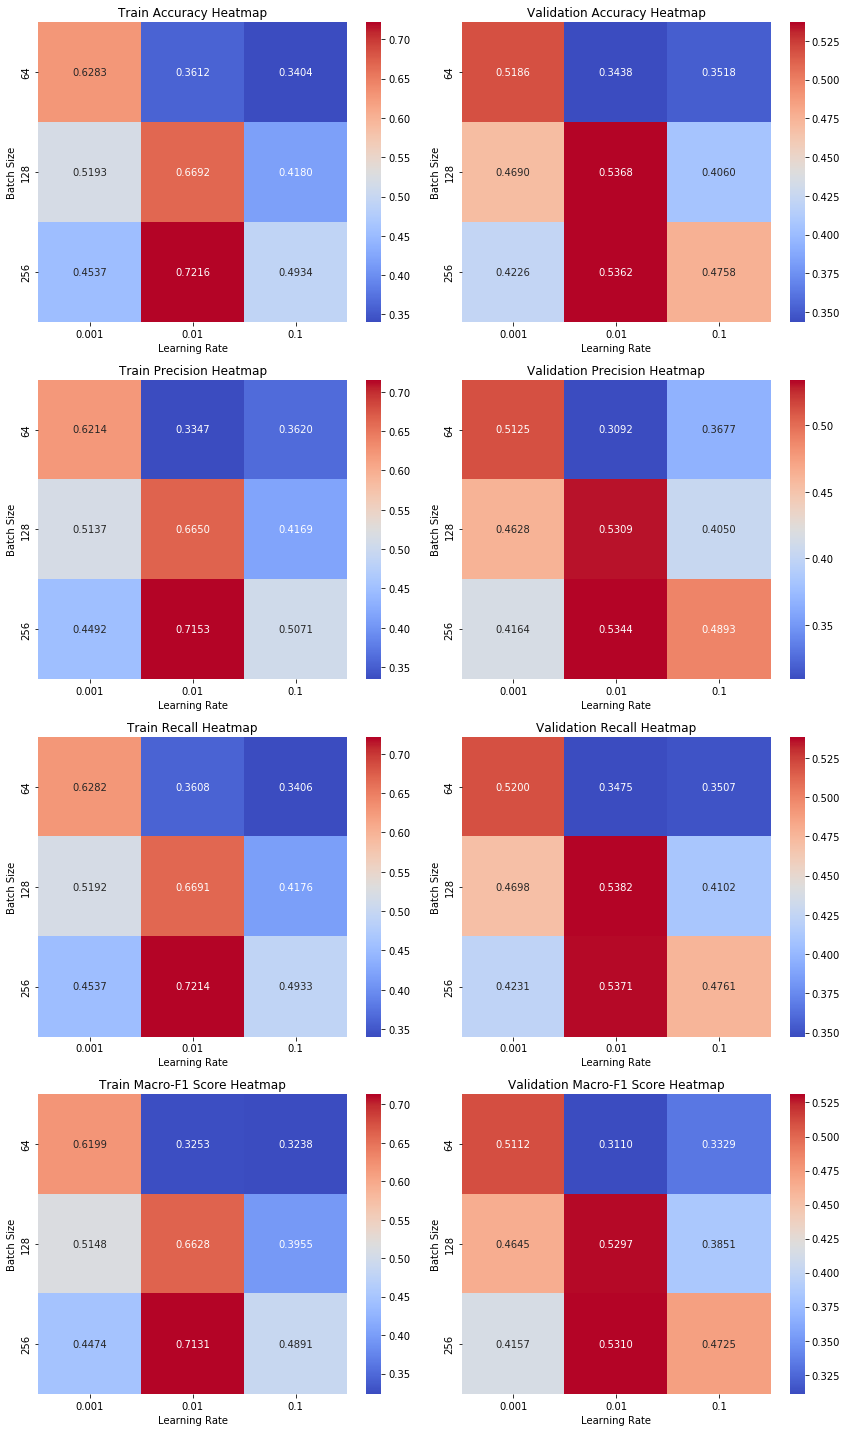

In [9]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_accuracy = np.reshape(train_acc, (len(batch_size), len(learning_rate)))
valid_accuracy = np.reshape(valid_acc, (len(batch_size), len(learning_rate)))
train_precision = np.reshape(train_precision, (len(batch_size), len(learning_rate)))
valid_precision = np.reshape(valid_precision, (len(batch_size), len(learning_rate)))
train_recall = np.reshape(train_recall, (len(batch_size), len(learning_rate)))
valid_recall = np.reshape(valid_recall, (len(batch_size), len(learning_rate)))
train_f1 = np.reshape(train_f1, (len(batch_size), len(learning_rate)))
valid_f1 = np.reshape(valid_f1, (len(batch_size), len(learning_rate)))


def plot_heatmap(ax, data, metric_name, cmap='coolwarm'):
    df = pd.DataFrame(data, index=batch_size, columns=learning_rate)
    sns.heatmap(df, annot=True, fmt='.4f', cmap=cmap, ax=ax)
    ax.set_title(f'{metric_name} Heatmap')
    ax.set_xlabel('Learning Rate')
    ax.set_ylabel('Batch Size')

fig, axes = plt.subplots(4, 2, figsize=(12, 20))
metrics = [
    ('Train Accuracy', train_accuracy),
    ('Validation Accuracy', valid_accuracy),
    ('Train Precision', train_precision),
    ('Validation Precision', valid_precision),
    ('Train Recall', train_recall),
    ('Validation Recall', valid_recall),
    ('Train Macro-F1 Score', train_f1),
    ('Validation Macro-F1 Score', valid_f1)
]

for i, (metric_name, data) in enumerate(metrics):
    row, col = divmod(i, 2)
    plot_heatmap(axes[row, col], data, metric_name)

plt.tight_layout()
plt.savefig('visual_outputs/combined_heatmap.png')
plt.show()

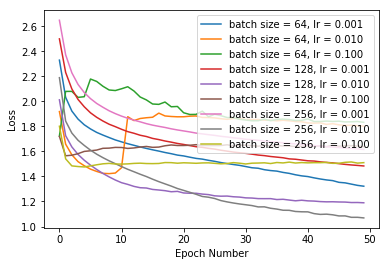

In [8]:
index = 0
for i in range(len(batch_size)):
    for j in range(len(learning_rate)):
        plt.plot(loss[index],label=f'batch size = {batch_size[i]:.0f}, lr = {learning_rate[j]:.3f}')
        index += 1
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
#plt.savefig('visual_outputs/batch_lr_loss.png')
plt.show()